In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Importing neccesary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)


### 1. Reading and Inspection


In [14]:
hotel = pd.read_csv('/Users/ilaburcev/Desktop/statistics_hotel/data/hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
print(hotel.shape)

(119390, 32)


In [11]:
# let's look at the statistical aspects of the dataframes
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
#checking datatypes
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 Набор данных состоит из 32 переменных с одной идентифицированной зависимой переменной (категориальной), которая называется is_cancelled. 

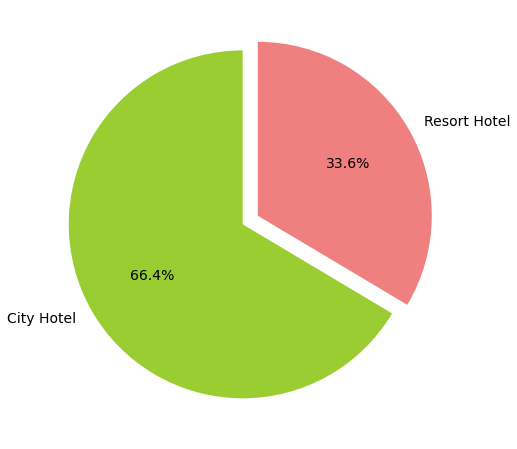

In [27]:
# Размеры
plt.rcParams['figure.figsize'] = 8,8

# Индексирование меток. tolist () преобразует индекс в список для упрощения манипуляции 
labels = hotel['hotel'].value_counts().index.tolist()

# Преобразовать количество значений в список 
sizes = hotel['hotel'].value_counts().tolist()

# Как следует из названия, Explode определит, насколько каждая секция отделена друг от друга 
explode = (0, 0.1)

# Определить цвет круговой диаграммы 
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

Мы видим, что процент городских отелей больше, чем курортных отелей.

Курортный отель, как правило, стоит дорого, и большинство людей предпочитают городской отель. 


### 2. Cleaning the Data


In [28]:
# Проверка недостающих значений в столбцах 

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [33]:
# Теперь в процентах

print(round(100*(hotel.isnull().sum()/len(hotel.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [34]:
# Удаление столбцов с большими нулями
hotel = hotel.drop(['agent', 'company'], axis=1)

#### Country имеет 488 строк со значениями NaN. 488 строк из 119390 незначительно, поэтому просто удалим. 

In [35]:
hotel = hotel.dropna(axis=0)

In [39]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [40]:
# переименуем слобцы

hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [41]:
# Определите непрерывные и категориальные переменные 

def var(hotel):
    unique_list = pd.DataFrame([[i,len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name','uniques']

    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques<=12)      | 
                                   (unique_list.name=='Country')  | 
                                   (unique_list.name=='Agent')                                     
                                  ])
    con_var = total_var - cat_var
    
    return cat_var, con_var 


cat_var, con_var = var(hotel)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 12 )
 {'Adults', 'WaitingDays', 'ArrivingDate', 'ADR', 'LeadTime', 'WeekendStay', 'ReservationDate', 'PrevBook', 'ChangeBooking', 'WeekStay', 'ArrivingWeek', 'PrevCancel'} 

Categorical Variables( 18 )
 {'ArrivingMonth', 'Segment', 'Children', 'DepositType', 'Babies', 'ParkSpace', 'Meal', 'SpecialRequest', 'Hotel', 'RepeatGuest', 'Reservation', 'BookRoomType', 'DistChannel', 'Canceled', 'AssignRoomType', 'CustomerType', 'Country', 'ArrivingYear'}


 ## Checking the Outliers

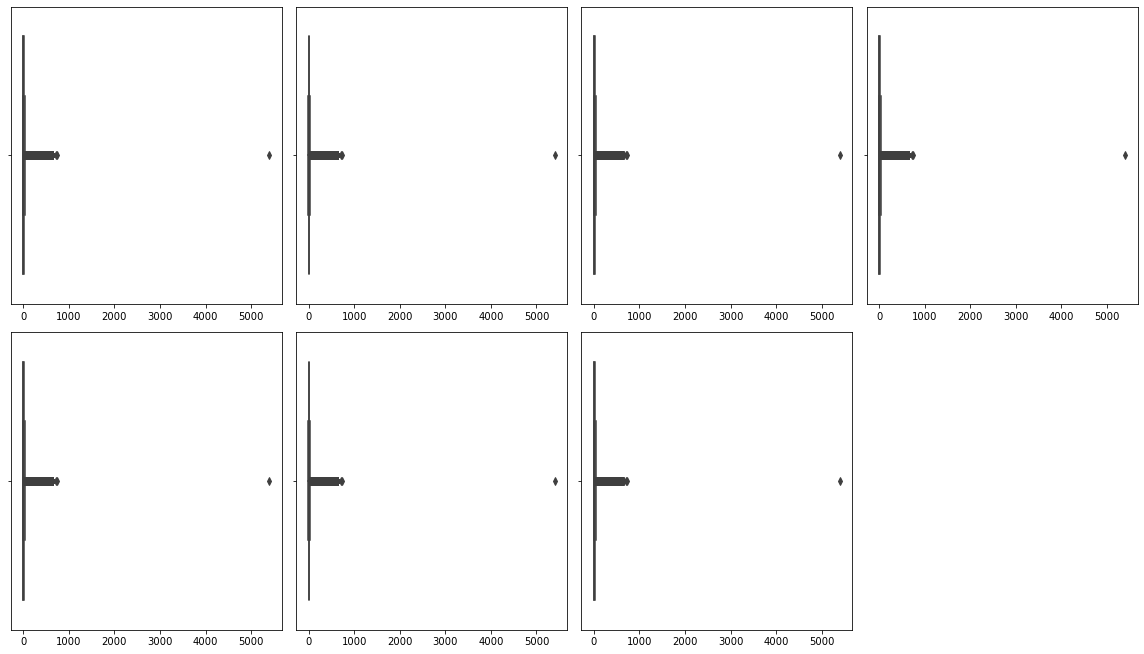

In [42]:
# Создание диаграммы для проверки выбросов

features = ['LeadTime', 'WeekendStay', 'WeekStay', 'Adults', 'Children', 'Babies', 'ADR']
n = 1
plt.figure(figsize=(16,18))
for feature in features:
    plt.subplot(4,4,n)
    sns.boxplot(hotel[features])
    n += 1
    plt.tight_layout()

In [43]:
# Набор данных содержит выбросы

# Проверка выбросов в непрерывных переменных 
hotel[con_var].describe()

,Adults,WaitingDays,ArrivingDate,ADR,LeadTime,WeekendStay,PrevBook,ChangeBooking,WeekStay,ArrivingWeek,PrevCancel
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.858391,2.330754,15.800880,102.003243,104.311435,0.928897,0.131634,0.221181,2.502145,27.166555,0.087142
std,0.578576,17.630452,8.780324,50.485862,106.903309,0.996216,1.484672,0.652785,1.900168,13.589971,0.845869
min,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,8.000000,70.000000,18.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000
50%,2.000000,0.000000,16.000000,95.000000,69.000000,1.000000,0.000000,0.000000,2.000000,28.000000,0.000000
75%,2.000000,0.000000,23.000000,126.000000,161.000000,2.000000,0.000000,0.000000,3.000000,38.000000,0.000000
max,55.000000,391.000000,31.000000,5400.000000,737.000000,16.000000,72.000000,21.000000,41.000000,53.000000,26.000000


### Список непрерывных переменных с выбросами, выявленными с помощью сводной статистики: 

    LeadTime
    WaitingDays
    WeekendStay
    Adults
    PrevBook
    PrevCancel
    WeekStay
    
### Список непрерывных переменных, которые должны быть категориальными:

    PrevBook
    PrevCancel



### Расчет выбросов (для непрерывной переменной) 

In [44]:
hotel.loc[hotel.LeadTime > 500, 'LeadTime'         ]=500
hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

cat_var = set(list(cat_var) + ['PrevBook', 'PrevCancel'])
con_var = set(hotel.columns) - cat_var

hotel[con_var].describe()


,Adults,WaitingDays,ArrivingDate,ADR,LeadTime,WeekendStay,ChangeBooking,WeekStay,ArrivingWeek
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,1.855607,0.031102,15.800880,102.003243,104.054543,0.924187,0.217237,2.481581,27.166555
std,0.488194,0.173595,8.780324,50.485862,105.834923,0.967762,0.602693,1.760766,13.589971
min,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,8.000000,70.000000,18.000000,0.000000,0.000000,1.000000,16.000000
50%,2.000000,0.000000,16.000000,95.000000,69.000000,1.000000,0.000000,2.000000,28.000000
75%,2.000000,0.000000,23.000000,126.000000,161.000000,2.000000,0.000000,3.000000,38.000000
max,4.000000,1.000000,31.000000,5400.000000,500.000000,5.000000,5.000000,10.000000,53.000000


In [45]:
hotel[cat_var].describe()

,RepeatGuest,Canceled,PrevCancel,Children,Babies,ParkSpace,PrevBook,ArrivingYear,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.371352,0.054223,0.104207,0.007948,0.061885,0.028571,2016.157656,0.571683
std,0.176029,0.483168,0.226458,0.399172,0.097380,0.244172,0.166597,0.707459,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
max,1.000000,1.000000,1.000000,10.000000,10.000000,8.000000,1.000000,2017.000000,5.000000


In [46]:
hotel.loc[hotel.Children  >  8, 'Children']=0
hotel.loc[hotel.Babies  > 8,  'Babies']=0
hotel.loc[hotel.ParkSpace  > 5, 'ParkSpace']=0

hotel[cat_var].describe()

,RepeatGuest,Canceled,PrevCancel,Children,Babies,ParkSpace,PrevBook,ArrivingYear,SpecialRequest
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.032011,0.371352,0.054223,0.104123,0.007788,0.061750,0.028571,2016.157656,0.571683
std,0.176029,0.483168,0.226458,0.398139,0.089236,0.241992,0.166597,0.707459,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2017.000000,5.000000


### 3.Подготовка данных

In [47]:
# объединю детей и младенцев вместе, как дети
hotel['kids'] = hotel.Children + hotel.Babies

# Объединим общее количество, добавив детей и взрослых
hotel['total_members'] = hotel.kids + hotel.Adults

In [52]:
# преобразовать типы данных в строку

hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')


In [53]:
# конвертирую дату прибытия в datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [59]:
confirmed_bookings = hotel[hotel.Canceled == '0']

In [61]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final = confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64


### 4. EDA


In [70]:
# Cancelations
print('Всего отменено бронирований')
print(hotel.Canceled.value_counts())
print('Процент отмены в обоих отелях ')
print(hotel.Canceled.value_counts(normalize=True))

Всего отменено бронирований
0    74745
1    44153
Name: Canceled, dtype: int64
Процент отмены в обоих отелях 
0    0.628648
1    0.371352
Name: Canceled, dtype: float64


#### Было отменено 44153 бронирований, что составляет около 37%


In [71]:
# Country

hotel.Country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
BFA    0.000008
DMA    0.000008
CYM    0.000008
ATF    0.000008
UMI    0.000008
Name: Country, Length: 177, dtype: float64

#### Около 40% всех бронирований было забронировано из Португалии, за которой следуют Великобритания (10%) и Франция (8%). 

In [72]:
# Month
hotel.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64

#### Август - самый загруженный месяц с 11,62% бронирований, а январь - самый свободный месяц с 4,96% бронирований.

In [73]:
# Mareket Segment
hotel.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

#### Около 47% бронирований совершается через онлайн-турагентов, почти 20% бронирований совершается через офлайн-турагентов и менее 20% - это прямые бронирования без каких-либо других агентов. 

In [75]:
# Year
hotel.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

#### 47% бронирований было выполнено в 2016 году, 34% в 2017 году и 18 процентов в 2015 году.Тенденция к увеличению количества бронирований по годам. 

In [76]:
# Meal
hotel.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

#### Из всех блюд BB (Bed & Breakfast) является наиболее заказываемым блюдом, которое составляет около 77,2%, за ним следуют HB (полупансион), SC (без питания), Undefined и FB (полный пансион).

In [77]:
# Customer Type
hotel.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

#### Переходный тип клиентов составляет около 75%

In [78]:
hotel.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

#### Мы видим, что 63% посетителей выполнили проверку, а 36% заказов были отменены.

### 4. Визуализация данных

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

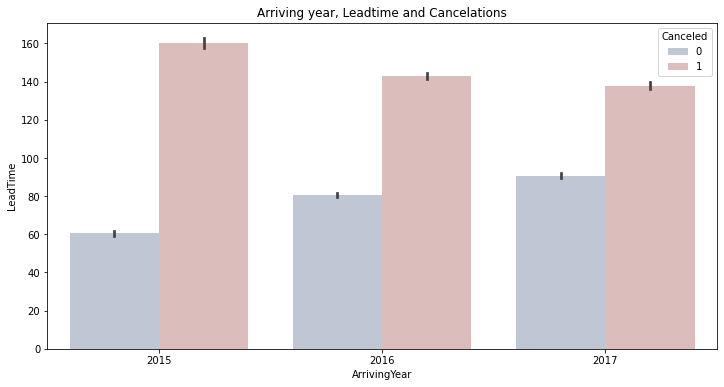

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime', hue='Canceled', data=hotel, palette='vlag')
plt.title('Arriving year, Leadtime and Cancelations')

#### В течение всех 3 лет заказы со сроком выполнения заказа менее 100 дней имеют меньше шансов быть отмененными, а время выполнения заказа более 100 дней имеет больше шансов быть отмененным.

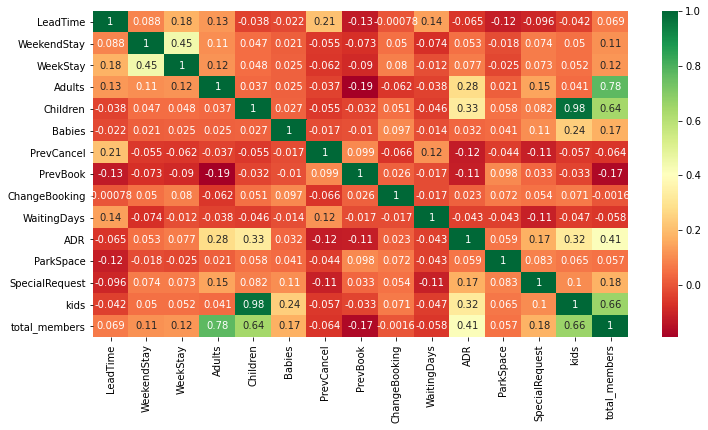

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(hotel.corr(),annot=True,cmap='RdYlGn')

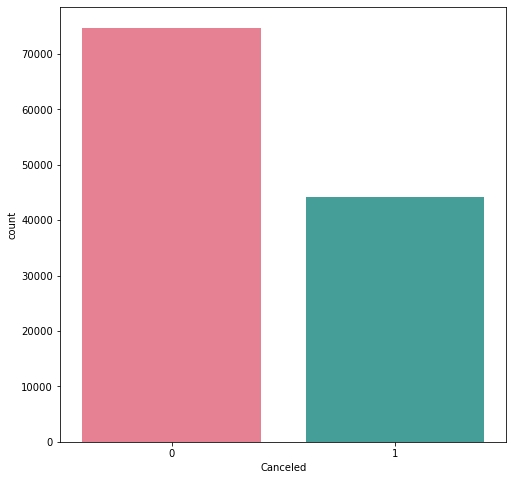

In [87]:
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette='husl')

plt.show()

#### Половина бронирований была отменена 

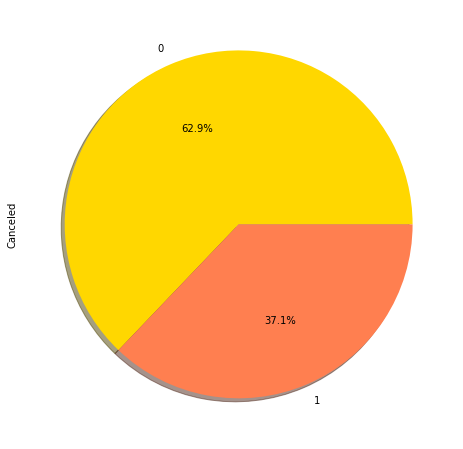

In [90]:
cols = ['gold', 'coral']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=cols)

#### Согласно круговой диаграмме, 63% бронирований не были отменены и 37% бронирований были отменены в отеле.

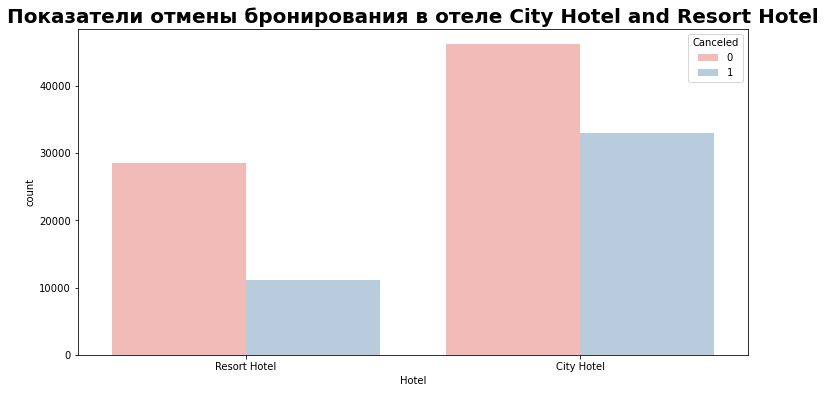

In [94]:
plt.figure(figsize=(12,6))

sns.countplot(x='Hotel', hue='Canceled', data=hotel, palette='Pastel1')
plt.title('Показатели отмены бронирования в отеле City Hotel and Resort Hotel', fontweight='bold', size=20)
plt.show()

In [96]:
### Большинство бронирований было в городских отелях
### Отмены в курортном отеле меньше, чем в городском отеле 

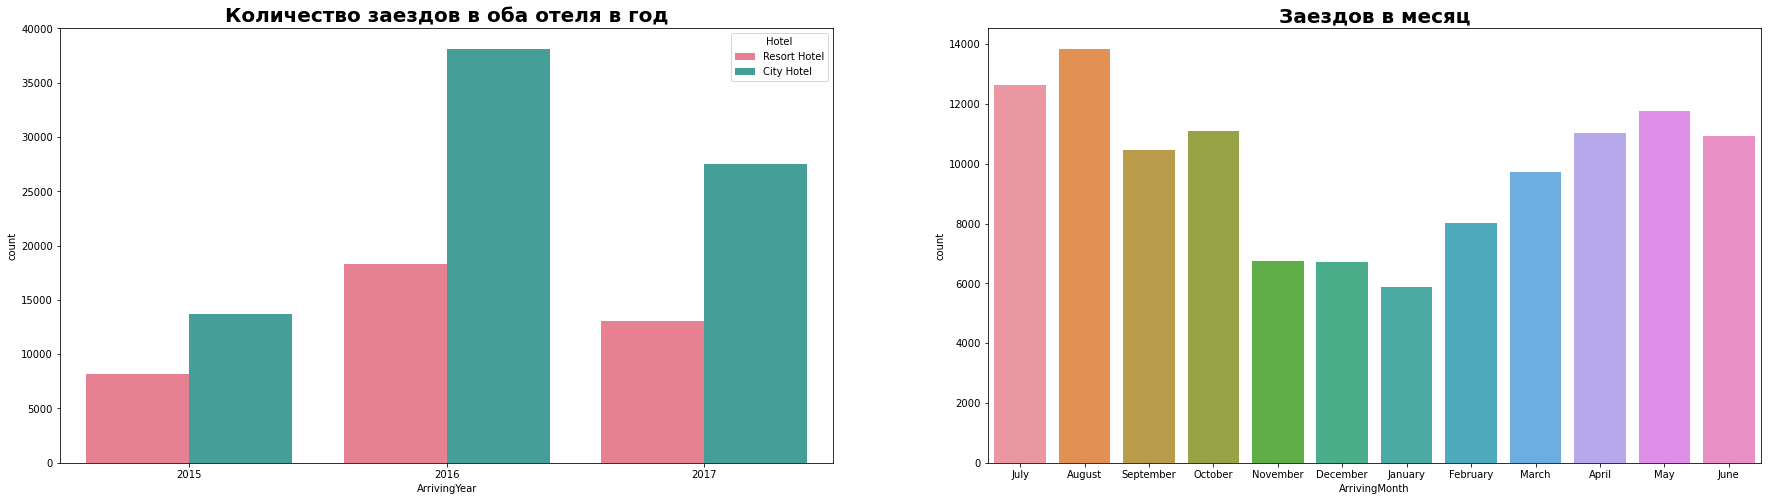

In [102]:
# Arrivals in month and year
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear', hue='Hotel', data=hotel, palette='husl')
plt.title('Количество заездов в оба отеля в год', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='ArrivingMonth')
plt.title('Заездов в месяц', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

In [103]:
### Мы видим, что большинство бронирований было сделано в 2016 году, а заказы были сделаны в отеле City
### Большинство бронирований было выполнено в мае, июне, июле, августе.

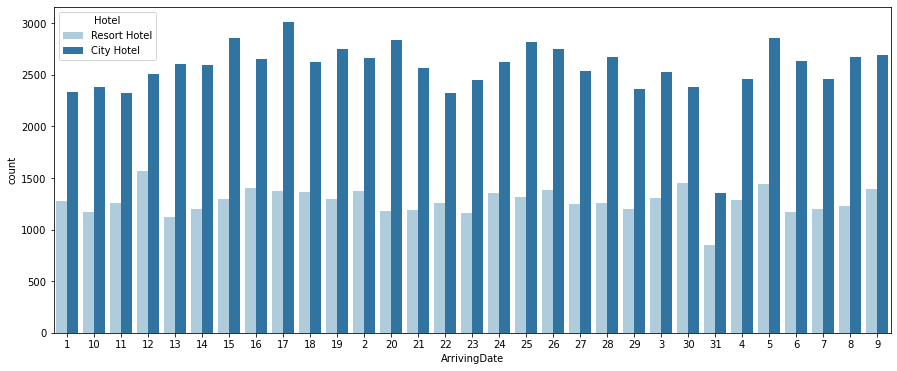

In [104]:
# Arriving Date
plt.figure(figsize=(15,6))

sns.countplot(data=hotel, x='ArrivingDate', hue='Hotel', palette='Paired')
plt.show()

In [105]:
### В день окончания месяца очень мало прибытий
### Бронирования больше в City Hotel

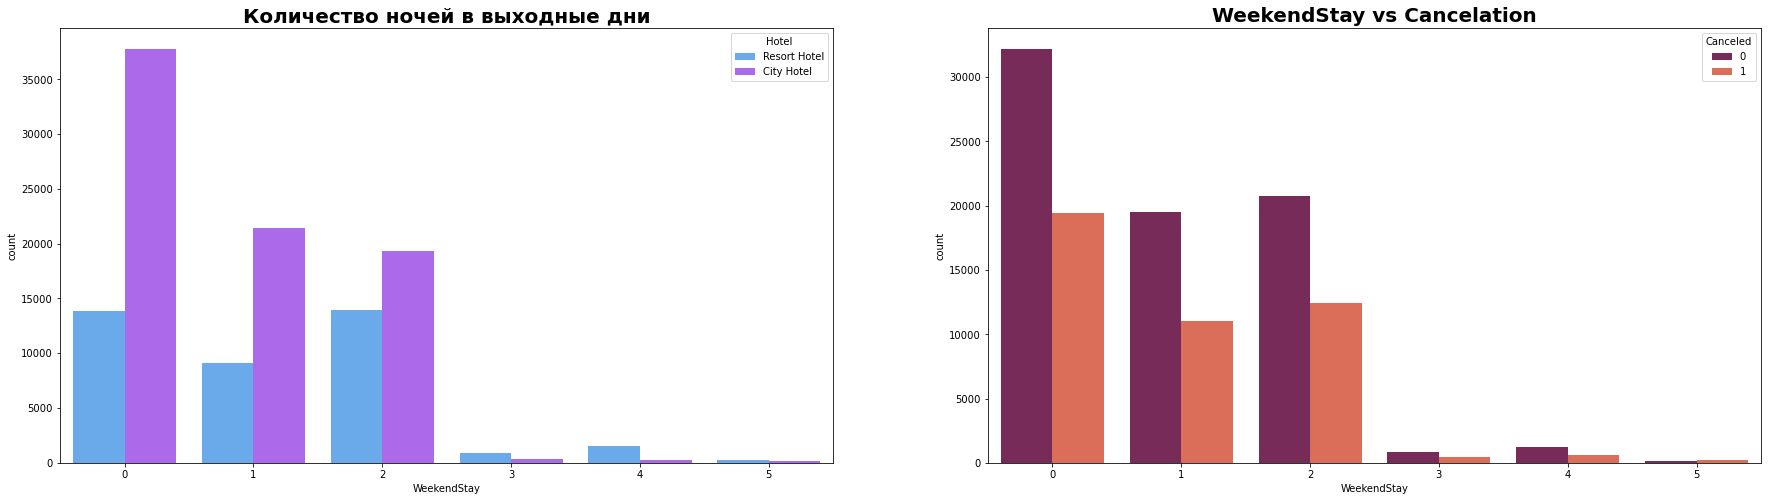

In [110]:
# Weekend Stay
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay', hue='Hotel', data=hotel, palette='cool')
plt.title('Количество ночей в выходные дни', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)
plt.show()

In [108]:
### На первом графике мы видим, что большинство ночей по выходным были забронированы в City Hotel.
### Второй график показывает, что большинство забронированных ночей в выходные дни не были отменены.

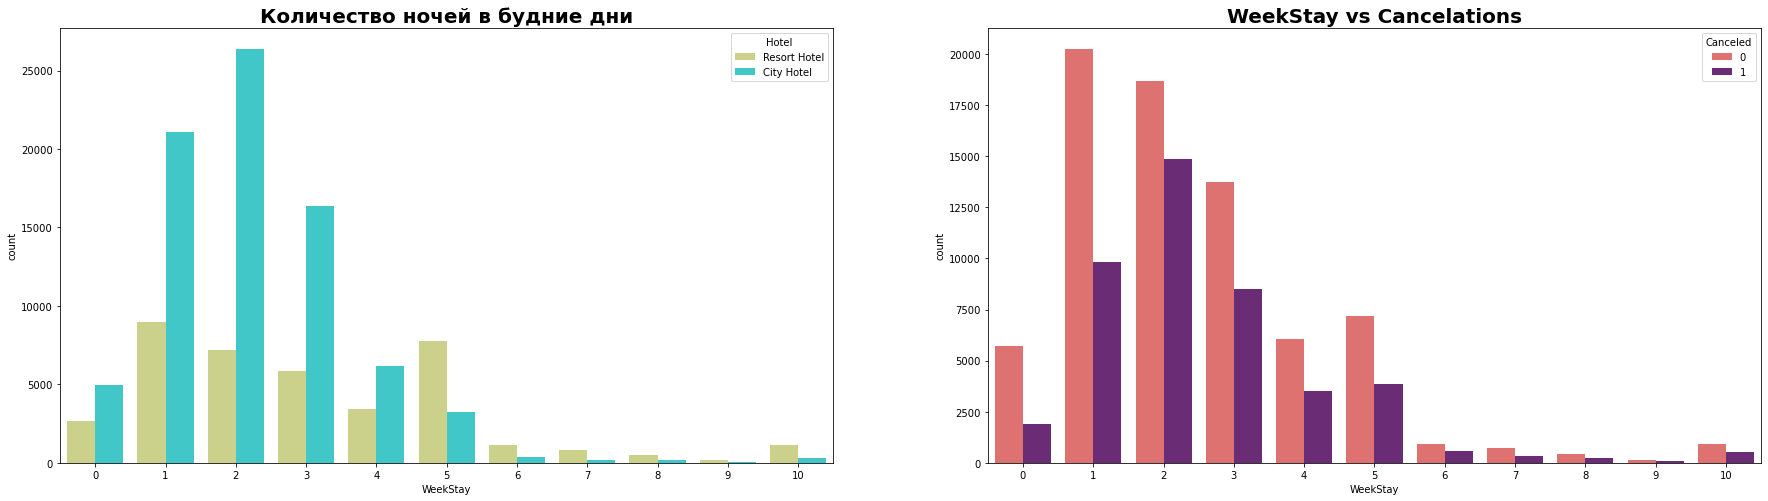

In [115]:
# WeekStay
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay', hue='Hotel', data=hotel, palette='rainbow_r' )
plt.title('Количество ночей в будние дни', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

In [113]:
### В будние дни в City Hotel было больше ночей
### Меньше отмен наблюдалось

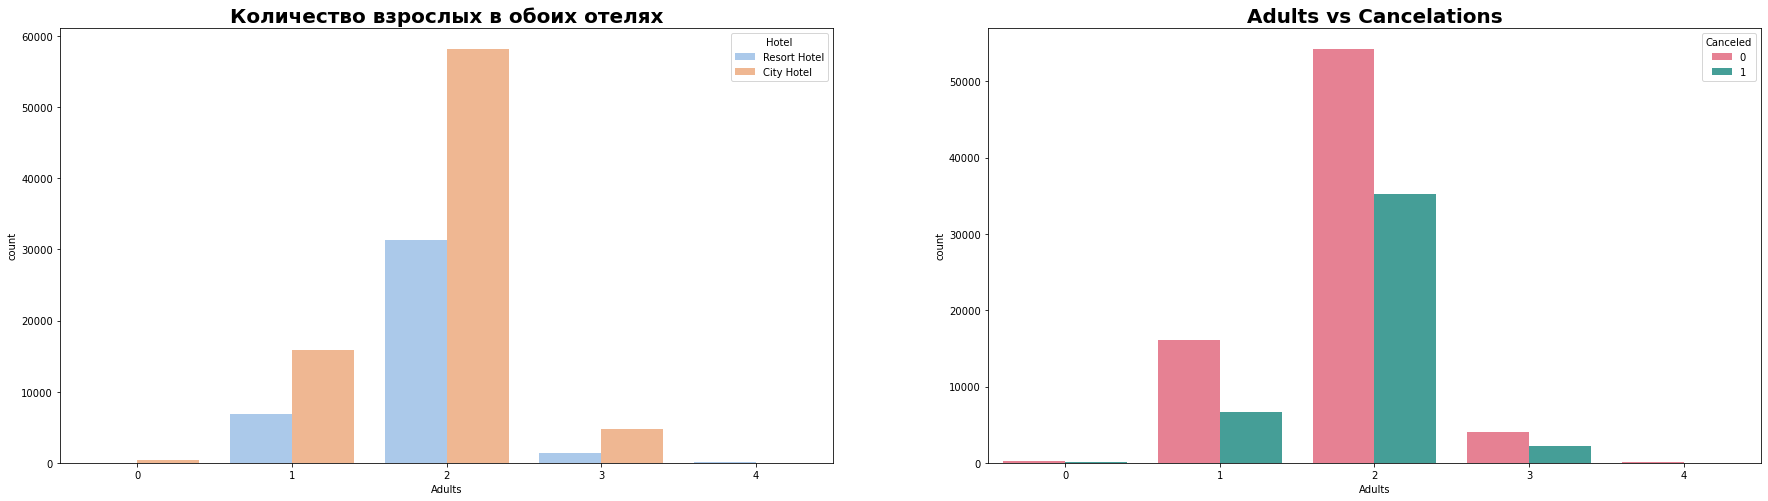

In [117]:
# Adults
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults', hue='Hotel', data=hotel, palette='pastel')
plt.title('Количество взрослых в обоих отелях', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

#### Взрослые, которых было 2 человека, больше предпочитают городской отель, чем курортный, более половины посетителей даже отменили бронирование.

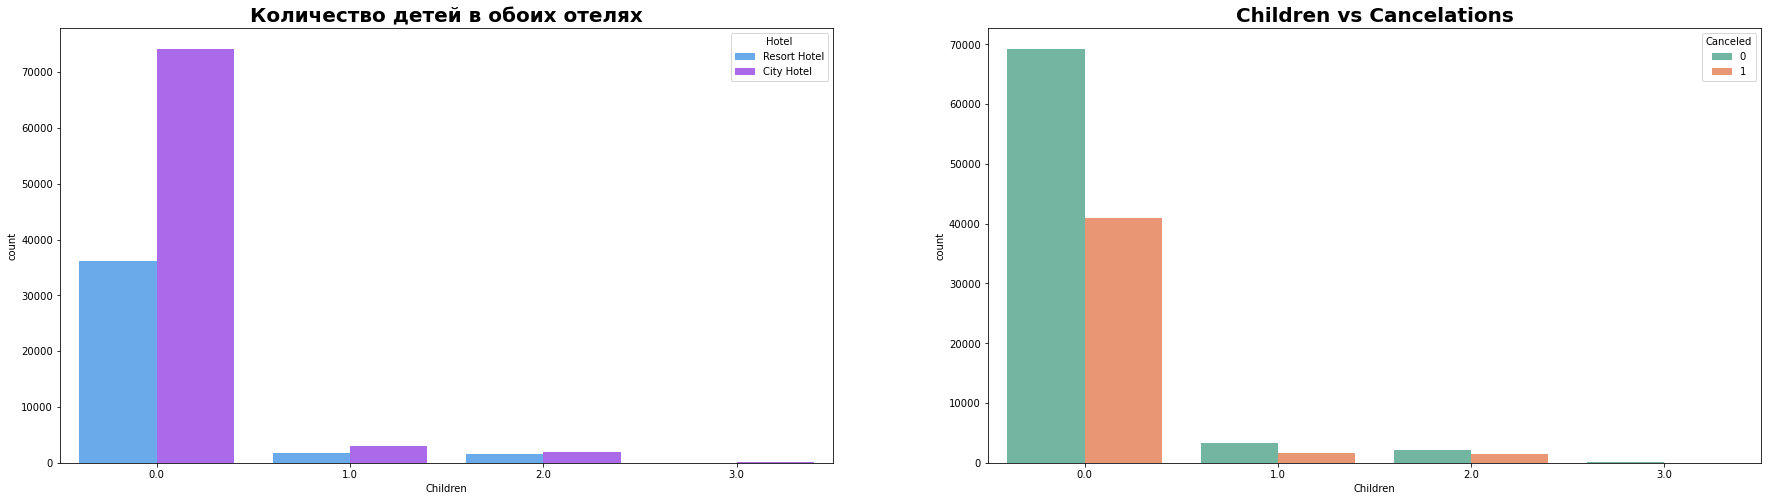

In [122]:
# Children
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children', hue='Hotel', data=hotel, palette='cool')
plt.title('Количество детей в обоих отелях', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

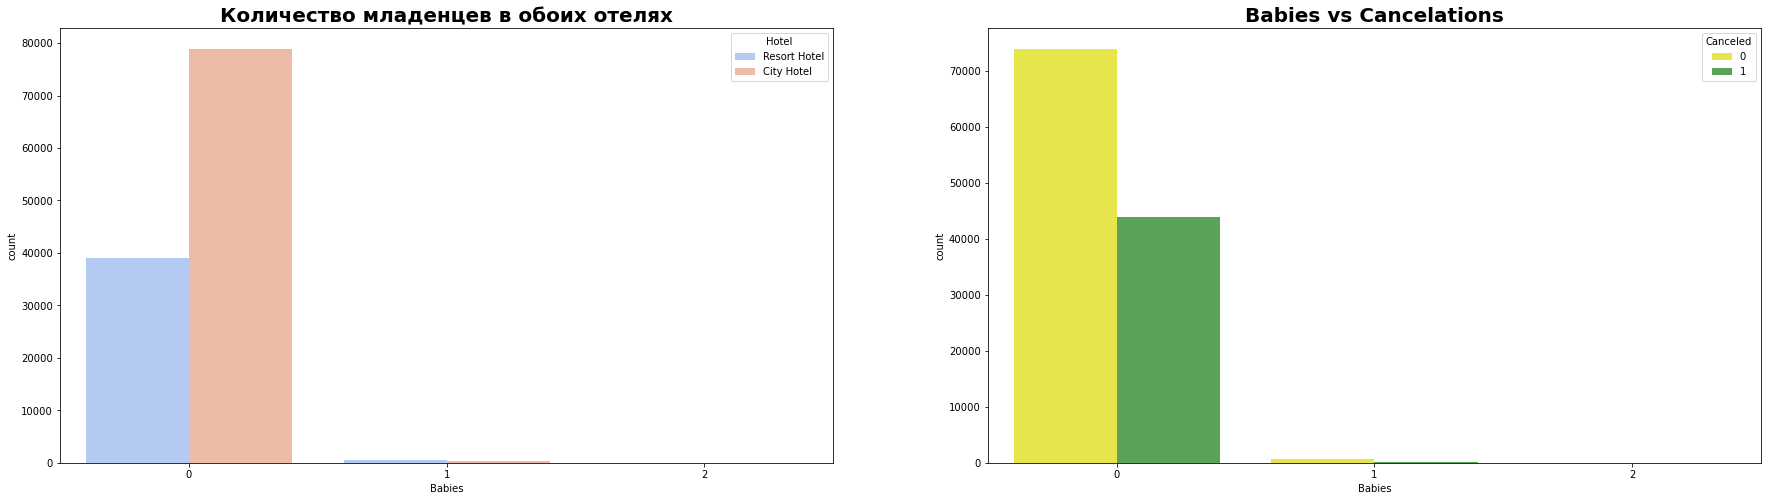

In [123]:
# Babies
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies', hue='Hotel', data=hotel, palette='coolwarm')
plt.title('Количество младенцев в обоих отелях', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

In [124]:
### Большинство посетителей прибыли парами без детей / младенцев и предпочли городской отель курортному отелю.
### посетители, у которых было 1 или 2 детей, также предпочли городской отель

In [125]:
# Country
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [128]:
country_visitors = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name='count')

import plotly.express as px

px.choropleth(country_visitors, 
             locations = 'Country',
             color = 'count',
             hover_name = 'Country', # столбец для добавления к информации о наведении 
             color_continuous_scale = 'Viridis',
             title = 'Home country vs visitors')

In [129]:
### Больше посетителей из Западной Европы, а именно из Франции, Великобритании и Португалии.

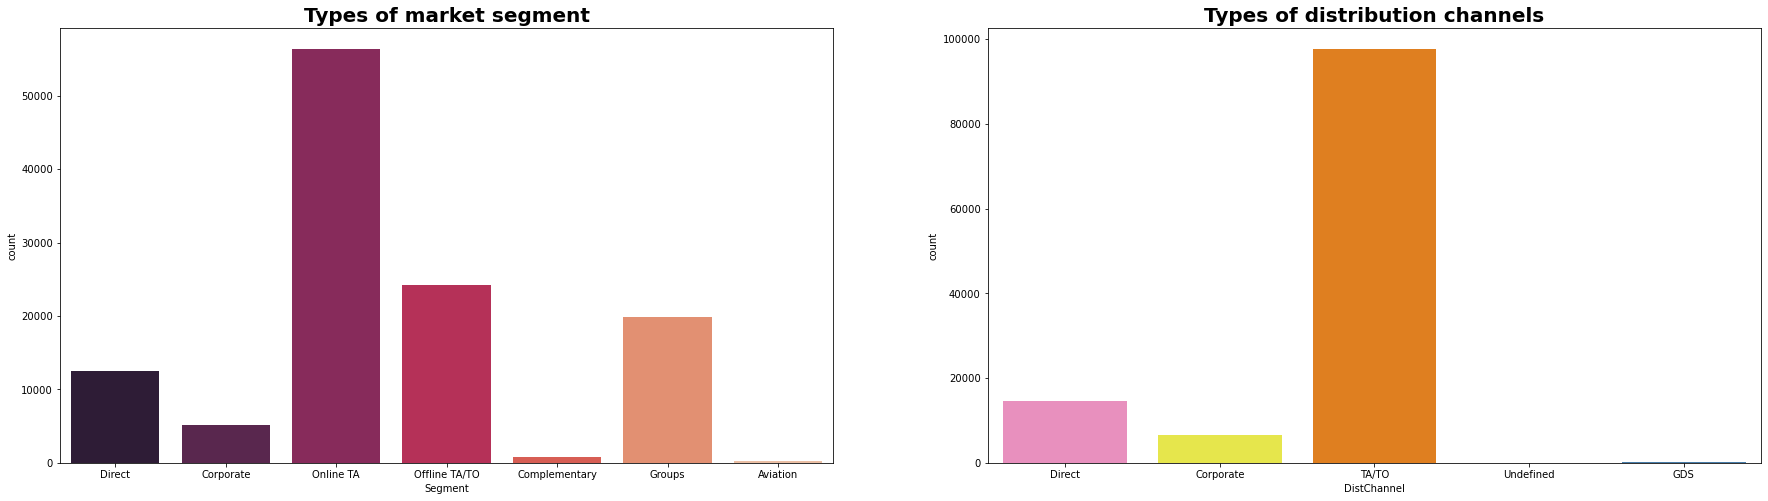

In [130]:
# Market
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of market segment', fontweight='bold', size=20)

plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x = 'DistChannel', palette='Set1_r')
plt.title('Types of distribution channels', fontweight='bold', size=20)
plt.subplots_adjust(right=1.7)

plt.show()

#### Большинство каналов распространения и сегмента рынка были туристическими агентствами, уходящими офлайн / онлайн. Так что лучше сосредоточиться на этом

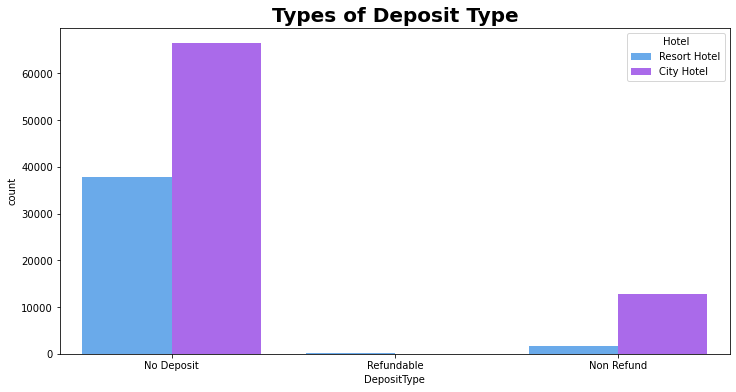

In [133]:
# Deposit
plt.figure(figsize=(12,6))

sns.countplot(data=hotel, x='DepositType', hue='Hotel', palette='cool')
plt.title('Types of Deposit Type', fontweight='bold', size=20)

plt.show()

In [135]:
# Не было депозита для отеля City, тогда как у Resorts были депозиты. Отсутствие депозита может привести к отмене бронирования

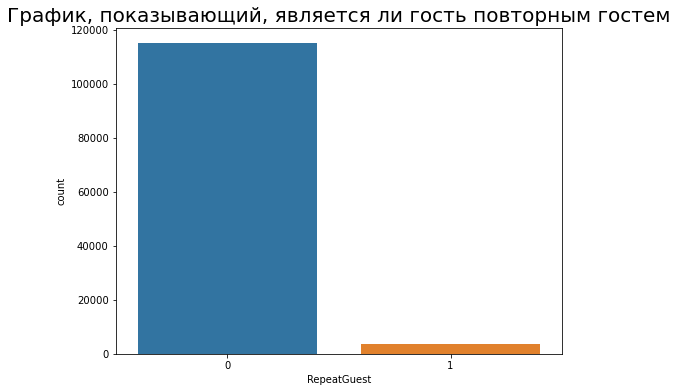

In [136]:
# Repeat guest
plt.figure(figsize=(8,6))

sns.countplot(data=hotel, x = 'RepeatGuest').set_title('График, показывающий, является ли гость повторным гостем', fontsize=20)
plt.show()


In [137]:
### Низкое количество повторных гостей.
### Необходимо настроить таргетинг на постоянных гостей, поскольку они бронировали раньше.

### Изучение цен в месяц за отель

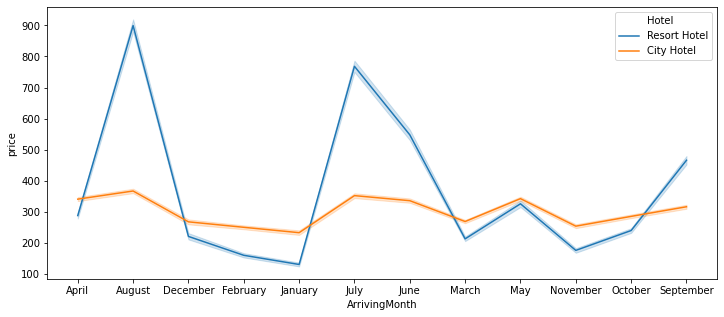

In [139]:
plt.figure(figsize=(12,5))

# Расчет средней дневной ставки на человека

hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children']) 
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

In [140]:
### Цены на курортный отель намного выше.
### Цены на городские отели не так сильно колеблются.

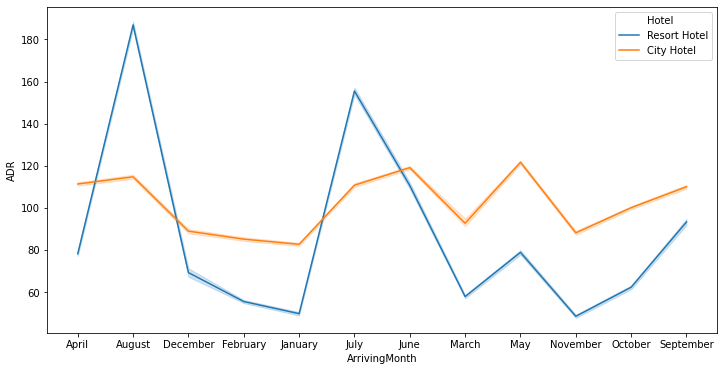

In [141]:
# ADR: средняя дневная ставка

plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data=hotel)
plt.show()

In [142]:
# Для курортного отеля ADR дороже в июле, августе и сентябре, а для City Hotel ADR немного больше в марте, апреле и мае. 


## Summary

#### Большинство забронированных отелей - это городские отели. Определенно нужно потратить наибольший целевой фонд на эти отели.
#### Также высокий процент отмен может быть вызван бездепозитной политикой.
#### Также должны ориентироваться на месяцы с мая по август. Это пиковые месяцы из-за летнего периода.
#### Большинство гостей из Западной Европы. Нужно потратить значительную часть бюджета на эту область.
#### Учитывая, что нет постоянных гостей, нацелить рекламу на гостей, чтобы увеличить количество вернувшихся гостей. 

## Стратегии борьбы с большим числом отмен в отеле

#### Установить невозвратные тарифы, собирать депозиты и применять более жесткие правила отмены.
#### Поощряйте прямое бронирование, предлагая специальные скидки.
#### Отслеживать, откуда поступают отмены, например, сегмент рынка, каналы распространения и т. Д. 